Preguntas a responder:

¿Hay variables que sean fuertemente influyentes en la felicidad de las personas?
¿Como se ve la felicidad de los países puesto en gráficas para realizar un análisis visual?
¿Que tan feliz es en general el mundo (media de felicidad)?

Este EDA se va a enfocar a realizar análisis visual de los datos, se quiere ver con esto muchos datos tales como, países con mayor felicidad, con mayor PBI, con mayor esperanza de vida, etc.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset_resultante_tarea_1.csv', index_col=1)

print(data)

                   Country name  Happiness scale  \
Regional indicator                                 
Western Europe          Finland            7.842   
Western Europe          Denmark            7.620   
Western Europe      Switzerland            7.571   
Western Europe          Iceland            7.554   
Western Europe      Netherlands            7.464   
...                         ...              ...   
Sub-Saharan Africa      Lesotho            3.512   
Sub-Saharan Africa     Botswana            3.467   
Sub-Saharan Africa       Rwanda            3.415   
Sub-Saharan Africa     Zimbabwe            3.145   
South Asia          Afghanistan            2.523   

                    Standard error of happiness scale  upperwhisker  \
Regional indicator                                                    
Western Europe                                  0.032         7.904   
Western Europe                                  0.035         7.687   
Western Europe                         

Primeramente leemos el csv y verificamos que efectivamente esta todo bien de como lo dejamos en google refine.

In [18]:
pd.options.display.float_format = "{:.3f}".format
data.describe()

,Happiness scale,Standard error of happiness scale,upperwhisker,lowerwhisker,Logged PBI per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score in Dystopia
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,5.533,0.059,5.648,5.418,9.432,0.815,64.993,0.792,-0.015,0.727,2.430
std,1.074,0.022,1.054,1.095,1.159,0.115,6.762,0.113,0.151,0.179,0.000
min,2.523,0.026,2.596,2.449,6.635,0.463,48.478,0.382,-0.288,0.082,2.430
25%,4.852,0.043,4.991,4.706,8.541,0.750,59.802,0.718,-0.126,0.667,2.430
50%,5.534,0.054,5.625,5.413,9.569,0.832,66.603,0.804,-0.036,0.781,2.430
75%,6.255,0.070,6.344,6.128,10.421,0.905,69.600,0.877,0.079,0.845,2.430
max,7.842,0.173,7.904,7.780,11.647,0.983,76.953,0.970,0.542,0.939,2.430


Aquí podemos ver algunas estadísticas importantes del dataset tales como los cuartiles, media, min y maximo para cada uno de los atributos.

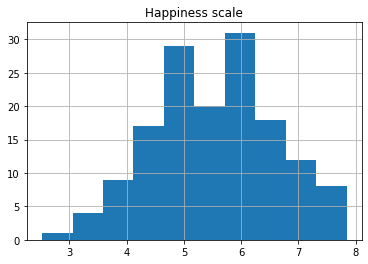

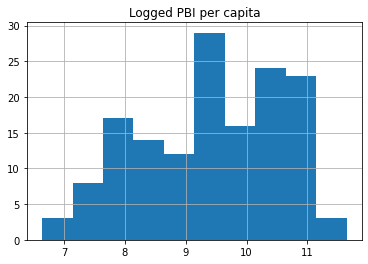

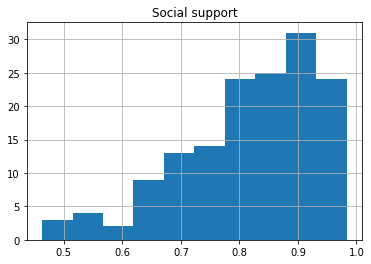

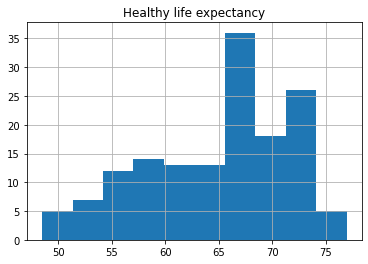

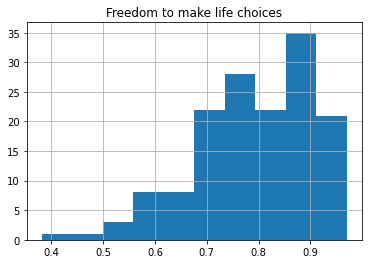

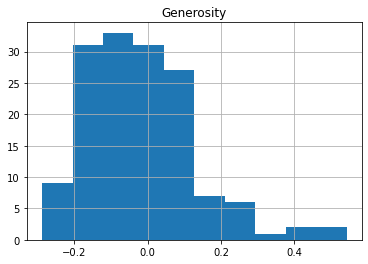

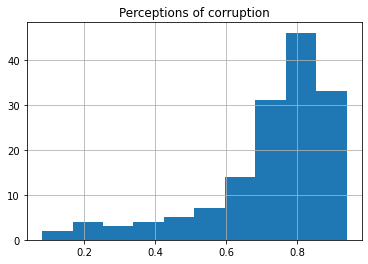

In [5]:
histogram = data.hist(column='Happiness scale')
histogram = data.hist(column='Logged PBI per capita')
histogram = data.hist(column='Social support')
histogram = data.hist(column='Healthy life expectancy')
histogram = data.hist(column='Freedom to make life choices')
histogram = data.hist(column='Generosity')
histogram = data.hist(column='Perceptions of corruption')

De estos histogramas podemos extraer mucha información, por ejemplo que en la mayoría de los paises la esperanza de vida es superior a los 55 años (información curiosa cuanto menos ya que se pensaría que lo normal es que los datos esten en torno a los 70 años y realmente hay bastantes datos inferiores a este). También podemos observar que en general en el mundo hay una alta percepción de la corrupción y que el nivel de generosidad en la mayoria de los paises es muy baja, dato muy triste.

In [19]:
print("Correlaciones de los atributos con happiness scale (correlaciones de Spearman)")
print("Logged PBI per capita: " + str(data['Happiness scale'].corr(data['Logged PBI per capita'], method='spearman')))
print("Social support: " + str(data['Happiness scale'].corr(data['Social support'], method='spearman')))
print("Healthy life expectancy: " + str(data['Happiness scale'].corr(data['Healthy life expectancy'], method='spearman')))
print("Freedom to make life choices: " + str(data['Happiness scale'].corr(data['Freedom to make life choices'], method='spearman')))
print("Generosity: " + str(data['Happiness scale'].corr(data['Generosity'], method='spearman')))
print("Perceptions of corruption: " + str(data['Happiness scale'].corr(data['Perceptions of corruption'], method='spearman')))

Correlaciones de los atributos con happiness scale (correlaciones de Spearman)
Logged PBI per capita: 0.8094072448957933
Social support: 0.7979930276367034
Healthy life expectancy: 0.7968622742533681
Freedom to make life choices: 0.6070860094955972
Generosity: -0.007643045211751676
Perceptions of corruption: -0.3008334112259268


Las correlaciones de Spearman lo que buscan es una relación de crecimiento o decrecimiento entre dos atributos, en este caso podemos observar que hay una alta correlación entre la felicidad y el PBI, social support y esperanza de vida. Lo que quiere decir que a cuanto más hay de estos atributos, más feliz se es.
Es curioso como parece no ser de tanta importancia el tener libertad para la toma de desiciones en la vida para ser más feliz ya que la correlación de estos atributos es de 0.60 lo cual es bajo en compración con los anteriormente mencionados que eran de 0.79 y 0.80. 
Finalmente, los atributos restantes parecen ser inversos a la felicidad, de manera que si uno crece el otro decrece y viceversa.

In [20]:
data.corr()

,Happiness scale,Standard error of happiness scale,upperwhisker,lowerwhisker,Logged PBI per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score in Dystopia
Happiness scale,1.000,-0.471,0.999,0.999,0.790,0.757,0.768,0.608,-0.018,-0.421,-0.000
Standard error of happiness scale,-0.471,1.000,-0.439,-0.501,-0.646,-0.531,-0.584,-0.275,0.138,0.277,-0.000
upperwhisker,0.999,-0.439,1.000,0.997,0.778,0.749,0.758,0.608,-0.013,-0.418,-0.000
lowerwhisker,0.999,-0.501,0.997,1.000,0.800,0.763,0.776,0.607,-0.023,-0.424,-0.000
Logged PBI per capita,0.790,-0.646,0.778,0.800,1.000,0.785,0.859,0.432,-0.199,-0.342,-0.000
Social support,0.757,-0.531,0.749,0.763,0.785,1.000,0.723,0.483,-0.115,-0.203,-0.000
Healthy life expectancy,0.768,-0.584,0.758,0.776,0.859,0.723,1.000,0.461,-0.162,-0.364,-0.000
Freedom to make life choices,0.608,-0.275,0.608,0.607,0.432,0.483,0.461,1.000,0.169,-0.401,-0.000
Generosity,-0.018,0.138,-0.013,-0.023,-0.199,-0.115,-0.162,0.169,1.000,-0.164,-0.000
Perceptions of corruption,-0.421,0.277,-0.418,-0.424,-0.342,-0.203,-0.364,-0.401,-0.164,1.000,-0.000


Aquí podemos ver la matriz de correlaciones, solo que aquí se usa la correlación de Pearson la cual se basa en buscar relaciones lineales.

In [21]:
data.var()

Happiness scale                      1.153
Standard error of happiness scale    0.000
upperwhisker                         1.112
lowerwhisker                         1.199
Logged PBI per capita                1.342
Social support                       0.013
Healthy life expectancy             45.725
Freedom to make life choices         0.013
Generosity                           0.023
Perceptions of corruption            0.032
Score in Dystopia                    0.000
dtype: float64

Aquí podemos observar que la varianza de Score in Dystopia es nula o muy baja, es por esto que podemos tomar la decisión de retirar del dataset este atributo.

In [22]:
del data["Score in Dystopia"]
data.head()

,Country name,Happiness scale,Standard error of happiness scale,upperwhisker,lowerwhisker,Logged PBI per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Regional indicator,,,,,,,,,,,
Western Europe,Finland,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186
Western Europe,Denmark,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179
Western Europe,Switzerland,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292
Western Europe,Iceland,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673
Western Europe,Netherlands,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338


Aquí podemos apreciar como efectivamente se retiró el atributo antes mencionado.
Cabe destacar que los paises están ordenados de mayor a menor, por lo tanto el los paises que se ven en la parte superior son los más felices.

<AxesSubplot:xlabel='Happiness scale', ylabel='Healthy life expectancy'>

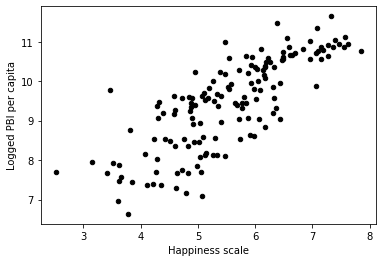

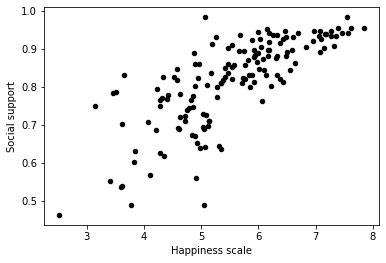

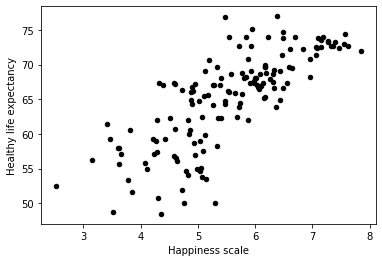

In [25]:
data.plot(x='Happiness scale', y='Logged PBI per capita', kind = 'scatter', color = 'black', alpha = 1)
data.plot(x='Happiness scale', y='Social support', kind = 'scatter', color = 'black', alpha = 1)
data.plot(x='Happiness scale', y='Healthy life expectancy', kind = 'scatter', color = 'black', alpha = 1)

Finalmente, mediante estos scatter plot podemos afirmar una vez más que cuanto más PIB, mayor esperanza de vida y más ayuda social haya en los paises, más felices son estos. Esto se puede deducir de los resultados de las correlaciones y apoyarlo con lo visto en estos gráficos.